# **Harris Corner Detector Tutorial**

In this notebook we will learn |how apply the Harris corner detector on some real images

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
from skimage.data import brick, rocket, chelsea

# get images
image_1 = brick()
image_2 = rocket()
image_3 = chelsea()

# convert to grayscale 
gray_1 = image_1.copy() # astype(np.float32) # bricks is already grayscale
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY) # .astype(np.float32)
gray_3 = cv2.cvtColor(image_3, cv2.COLOR_RGB2GRAY) # .astype(np.float32)


# # 0-1 normalize
# image_1 /= image_1.max()
# image_2 /= image_2.max()
# image_3 /= image_3.max()

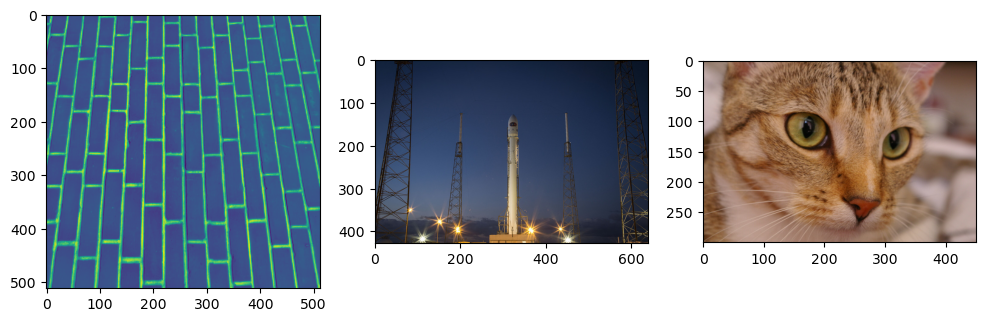

In [44]:
_, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(image_1)
ax[1].imshow(image_2)
ax[2].imshow(image_3);

## Apply Harris Corner Detection

In [45]:
# set Harris Hyperparameters

# window size for the Gaussian Smoothing (larger values will make the corners less localized)
blockSize = 12 

# kernel size for the Sobel Operators
ksize = 3

# hyperparameter for the Harris Corner Response (smaller values allow more features to be detected)
k = 0.025 

# convert image to grayscale float

# compute Harris Corner responses
R = cv2.cornerHarris(gray_1.astype(np.float32), blockSize, ksize, k)

# dilate
R = cv2.dilate(R, None)

# threshold image and convert to uint8
ret, dst = cv2.threshold(R, 0.05*R.max(), 255, 0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(image_1, np.float32(centroids), (5,5), (-1,-1), criteria)

# draw detected corners on the image
if len(image_1.shape) > 2:
    image_out = image_1.copy()
else:
    image_out = np.dstack((image_1, image_1, image_1))

for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)


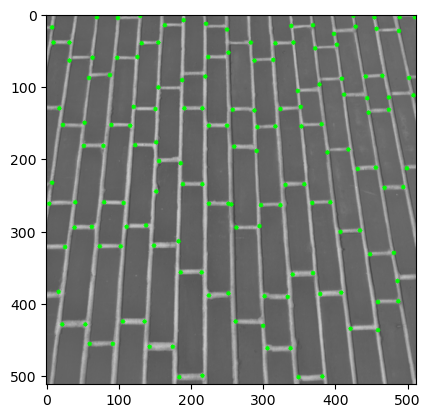

In [46]:
plt.imshow(image_out)

Make a Corner Detection pipeline

In [73]:
def harris_corner(image, gray, blockSize, ksize, k, noise=False):

    if noise:
        awgn = np.random.normal(0, 5, size=gray.shape).astype(np.uint8)
    else:
        awgn = 0

    # compute Harris Corner responses
    R = cv2.cornerHarris(gray + awgn, blockSize, ksize, k)

    # dilate
    R = cv2.dilate(R, None)

    # threshold image and convert to uint8
    ret, dst = cv2.threshold(R, 0.05*R.max(), 255, 0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria)

    # draw detected corners on the image
    if len(image.shape) > 2:
        image_out = image.copy()
    else:
        image_out = np.dstack((image, image, image))

    for (x, y) in corners:
        x = np.round(x).astype(int)
        y = np.round(y).astype(int)
        cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

    return corners, image_out

In [118]:
# corners_1, image_out_1 = harris_corner(image_1, gray_1, blockSize=12, ksize=3, k=0.025)
corners_1, image_out_1 = harris_corner(image_1, gray_1, blockSize=12, ksize=3, k=0.005, noise=True) # blocksize is meant to reduce noise!
corners_2, image_out_2 = harris_corner(image_2, gray_2, blockSize=4, ksize=5, k=0.05)
# corners_3, image_out_3 = harris_corner(image_3, gray_3, blockSize=8, ksize=5, k=0.0025)
corners_3, image_out_3 = harris_corner(image_3, gray_3, blockSize=4, ksize=3, k=0.05, noise=False) # use large blocksize to get larger features

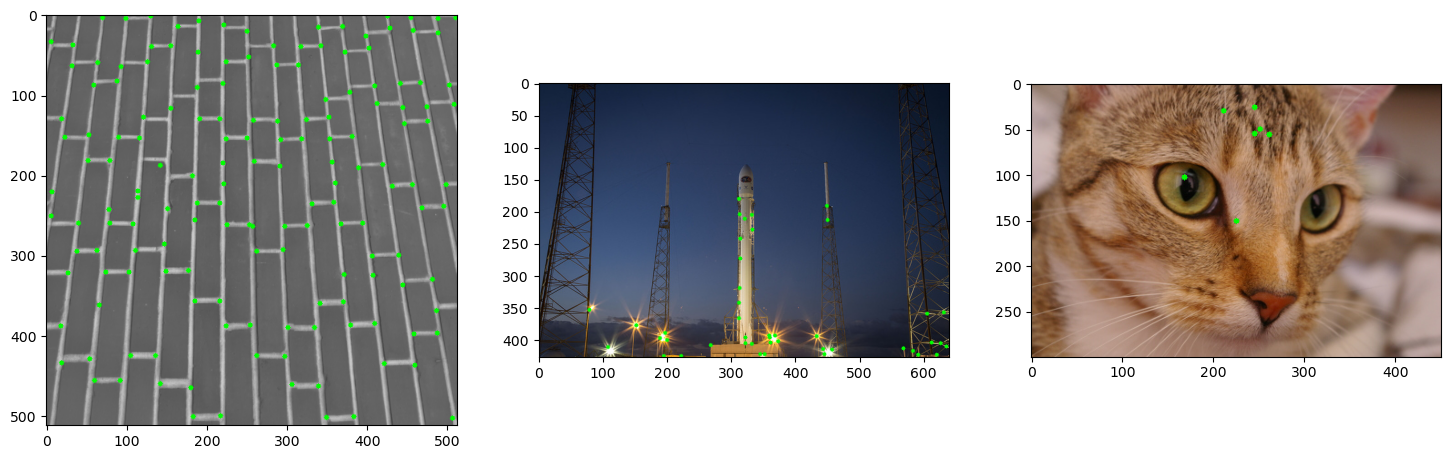

In [119]:
_, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].imshow(image_out_1)
ax[1].imshow(image_out_2)
ax[2].imshow(image_out_3);

### Impact of Blocksize

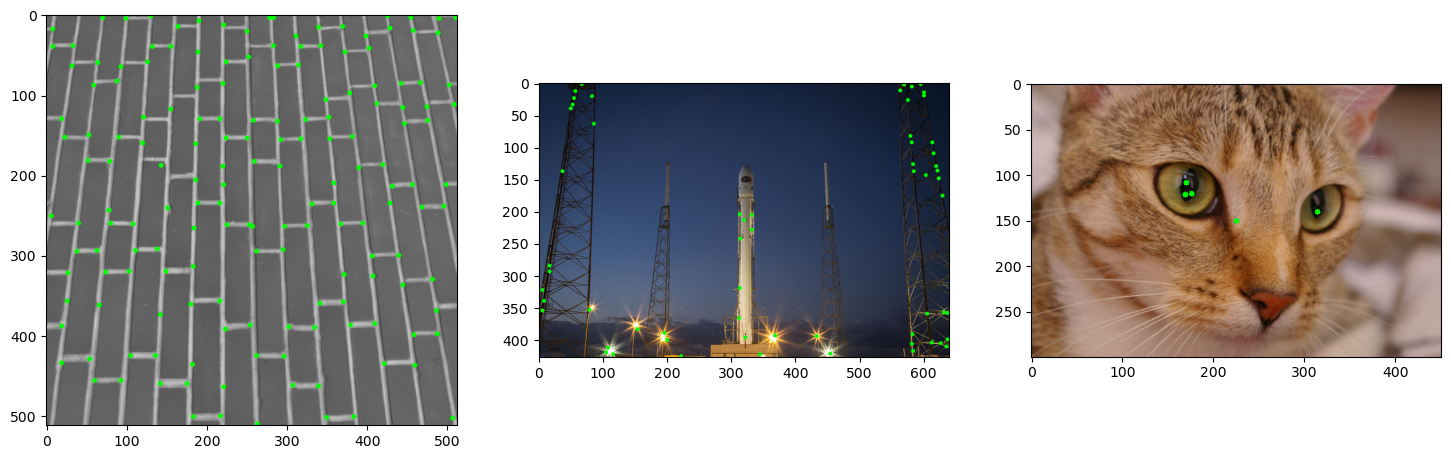

In [140]:
corners_1, image_out_1 = harris_corner(image_1, gray_1, blockSize=12, ksize=3, k=0.005, noise=True) # large blocksize is meant to reduce noise!
corners_2, image_out_2 = harris_corner(image_2, gray_2, blockSize=2, ksize=3, k=0.005, noise=True)
corners_3, image_out_3 = harris_corner(image_3, gray_3, blockSize=2, ksize=3, k=0.005, noise=True) # use large blocksize to get larger features

_, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].imshow(image_out_1)
ax[1].imshow(image_out_2)
ax[2].imshow(image_out_3);